In [1]:
import re
from pandas import DataFrame
import numpy as np
import matplotlib.font_manager as fm
import os
import matplotlib.pyplot as plt
import pandas as pd
from konlpy.tag import Kkma
import nltk
kkma = Kkma()
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter

In [2]:
#csv 불러오기
df = pd.read_csv('C:/Users/User/Desktop/기획경영_전처리/경영지원.csv',encoding = 'utf-8')
df

,주요 업무,자격요건 및 우대사항
0,자금 출납 및 운용 부가세법인세 신고 및 기타 세무 그 외 전반적인 재무 관련 업...,컴퓨터 활용 능력 우수자 ...
1,1 관리손익 부서별 매장별 브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립...,대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고 키즈 및 ...
2,MGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 ...,기업의 PL 지표에 대한 이해를 바탕으로 수익성 개선을 위한 과제 정의가 가능하...
3,엘리스 부트캠프 졸업생의 진로 설계와 취업 준비를 돕습니다 채용시장 분석을 통해 ...,엘리스 트랙을 비롯한 개발 부트캠프에 관심이 있는 분 타인의 성장을 위해 방향을 ...
4,엘리스 훈련 교육 과정에 참여할 외부 강사를 구인 및 관리합니다 강사 다이렉트 소...,개발자 취업 준비생과 개발자 취업채용 시장에 대한 이해가 있으신 분 부트캠프 등 ...
5,회사 전반적 운영 업무 수행 재무인사구매 관련 업무 업체 계약 및 매입매출 관리 ...,서울 소재 4년제 대학 졸업자학사 계획적인 일정 관리 능력 세심한 자료 관리백업...
6,1 관리손익 부서별 매장별 브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립...,대학교4년 졸업 과장대리급48년 경영기획 경험 4년 이상 분석적 사고 키즈 및 ...
7,나라장터 입찰 제안서 작성 제안 전략 수립 제안서 관리 및 문서화 입찰 계약 등 ...,대졸이상 전공무관 입찰 제안서 작성 및 관리 경험 보유 경력 2년 이상 OA 활용...
8,경영지원 정관 등록 신고 허가 등기 권리 관리 및 갱신 주주총회 이사회 소집 진행...,관련 업계직무 근무경험 3년 이상 Office 툴Excel word 등 활용 능력...
9,리텐틱스 팀은 실리콘밸리에 본사를 두고 서울에 지사를 운영하고 있습니다 실리콘밸리에...,경영지원 및 총무 관련 경험을 2년 이상 5년 미만 보유하신 분 스스로의 성장에 ...


In [3]:
#사용할 column 선택
df = df[['주요 업무']]
df

,주요 업무
0,자금 출납 및 운용 부가세법인세 신고 및 기타 세무 그 외 전반적인 재무 관련 업...
1,1 관리손익 부서별 매장별 브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립...
2,MGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 ...
3,엘리스 부트캠프 졸업생의 진로 설계와 취업 준비를 돕습니다 채용시장 분석을 통해 ...
4,엘리스 훈련 교육 과정에 참여할 외부 강사를 구인 및 관리합니다 강사 다이렉트 소...
5,회사 전반적 운영 업무 수행 재무인사구매 관련 업무 업체 계약 및 매입매출 관리 ...
6,1 관리손익 부서별 매장별 브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립...
7,나라장터 입찰 제안서 작성 제안 전략 수립 제안서 관리 및 문서화 입찰 계약 등 ...
8,경영지원 정관 등록 신고 허가 등기 권리 관리 및 갱신 주주총회 이사회 소집 진행...
9,리텐틱스 팀은 실리콘밸리에 본사를 두고 서울에 지사를 운영하고 있습니다 실리콘밸리에...


In [4]:
#txt로 저장
i = 'C:/Users/User/Desktop/기획경영_전처리/경영지원(주요업무).txt'
df.to_csv(i, sep = "\t", index = False, encoding='utf-8')

In [5]:
from konlpy.corpus import kobill
doc_ko = open(i, encoding='utf-8').read()
doc_ko

'주요 업무\n 자금 출납 및 운용 부가세법인세 신고 및 기타 세무 그 외 전반적인 재무 관련 업무 지원 자금관리 금융거래 실무 사무실 비품 자산 관리 법무 및 사무 업무 지원\n1 관리손익 부서별  매장별  브랜드별 관리손익 산출2 사업계획 연간 사업계획 수립3 예산관리 사업계획 근거 예산 운영4 중장기 계획 3  5  10년 중장기 계획 수립5 경쟁사  환경분석 경쟁사 실적 및 내외부 환경 분석6 회의체 운영 기간별 회의체 운영7 지표관리 재고  손익 지표  산출 및 보고\nMGRV가 전개하는 다양한 형태의 사업의 수익성 개선 및 고객 만족도 제고를 위한 영업 및 운영 전략을 수립합니다 재무적인 지표는 물론 customer journey 전반에 걸친 다양한 지표들을 테이터베이스화하고 분석하여 전략적 시사점을 도출하는 역할을 합니다 소규모 프로젝트를 독립적으로 맡아 이끌어 나가기도 하며 부동산개발운영시설브랜드 디자인개발 등 전사 모든 부서들과 밀접하게 협업합니다  Revenue manager로 가격 정책 운영을 통한 매출 증대  운영 중인 지점의 재무 및 운영 관련 선행 지표 관리  비즈니스 수익성 개선을 위한 전략 과제 선정 및 문제 해결  고객 및 공간 운영 데이터 분석을 통한 전략적 시사점 도출\n 엘리스 부트캠프 졸업생의 진로 설계와 취업 준비를 돕습니다 채용시장 분석을 통해 테크 기업직군이 지원자에 요구하는 역량 파악 주기적인 취업상담을 통해 졸업생의 취업연계 지원 취업현황 관리 취업 관련 데이터 수집 및 분석 보고서 작성 채용 성사율을 높일 수 있는 채용행사를 기획하고 운영합니다 기업이 참가하는 채용 설명회 채용 박람회 등 기획 및 운영 졸업생이 역량을 준비할 수 있는 이력서 특강 면접 특강 등 기획 및 강의 채용 직무와 사용 기술이 엘리스 트랙과 맞는 기업을 발굴합니다 기업 및 시장 동향 분석 신규 파트너 기업 소싱 기존 파트너 기업과의 긴밀한 파트너 관계 구축 수료생과 파트너 기업 간의 취업 매칭을 위한 전략 수립 및 실행 기업에 엘리스 트랙과

In [6]:
from konlpy.tag import Okt; t = Okt()
tokens_ko = t.nouns(doc_ko)
tokens_ko

['주요',
 '업무',
 '자금',
 '출납',
 '및',
 '운용',
 '부가세',
 '법인세',
 '신고',
 '및',
 '기타',
 '세무',
 '그',
 '외',
 '전반',
 '재무',
 '관련',
 '업무',
 '지원',
 '자금',
 '관리',
 '금융',
 '거래',
 '실무',
 '사무실',
 '비품',
 '자산',
 '관리',
 '법무',
 '및',
 '사무',
 '업무',
 '지원',
 '관리',
 '손익',
 '부서',
 '별',
 '매장',
 '별',
 '브랜드',
 '별',
 '관리',
 '손익',
 '산출',
 '사업',
 '계획',
 '연간',
 '사업',
 '계획',
 '수립',
 '예산',
 '관리',
 '사업',
 '계획',
 '근거',
 '예산',
 '운영',
 '중',
 '장기',
 '계획',
 '중',
 '장기',
 '계획',
 '수립',
 '경쟁',
 '사',
 '환경',
 '분석',
 '경쟁',
 '사',
 '실적',
 '및',
 '외부',
 '환경',
 '분석',
 '회의',
 '체',
 '운영',
 '기간',
 '별',
 '회의',
 '체',
 '운영',
 '지표',
 '관리',
 '재고',
 '손익',
 '지표',
 '산출',
 '및',
 '보고',
 '전개',
 '형태',
 '사업',
 '수익',
 '개선',
 '및',
 '고객',
 '만족도',
 '고',
 '위',
 '영업',
 '및',
 '운영',
 '전략',
 '수립',
 '재무',
 '지표',
 '전반',
 '지표',
 '테이',
 '터',
 '베이스',
 '분석',
 '전략',
 '점',
 '도출',
 '역할',
 '소규모',
 '프로젝트',
 '독립',
 '부동산',
 '개발',
 '운영',
 '시설',
 '브랜드',
 '디자인',
 '개발',
 '등',
 '전사',
 '모든',
 '부서',
 '협업',
 '로',
 '가격',
 '정책',
 '운영',
 '통한',
 '매출',
 '증대',
 '운영',
 '중인',
 '지점',
 '재무',
 '및',

In [7]:
ko = nltk.Text(tokens_ko, name = 'work')
print(len(ko.tokens))
print(len(set(ko.tokens)))
ko.vocab()

2949
584


FreqDist({'및': 195, '관리': 169, '업무': 88, '운영': 77, '지원': 69, '등': 67, '사업': 41, '관련': 31, '채용': 28, '기획': 26, ...})

In [8]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [9]:
stop_words = [
    '실행','수립','사요','작성','문제','우수','능력','관련','이상','기반','비즈니스','활용','스타트업','역량','사업','우대','이해도','보유','업무','대한','경력','분','및','해결', '일', '등', '직', '더', '위', '수', '팀', '자사', '경험', '마','피', '내']

ko = [each_word for each_word in ko if each_word not in stop_words]
ko

['주요',
 '자금',
 '출납',
 '운용',
 '부가세',
 '법인세',
 '신고',
 '기타',
 '세무',
 '그',
 '외',
 '전반',
 '재무',
 '지원',
 '자금',
 '관리',
 '금융',
 '거래',
 '실무',
 '사무실',
 '비품',
 '자산',
 '관리',
 '법무',
 '사무',
 '지원',
 '관리',
 '손익',
 '부서',
 '별',
 '매장',
 '별',
 '브랜드',
 '별',
 '관리',
 '손익',
 '산출',
 '계획',
 '연간',
 '계획',
 '예산',
 '관리',
 '계획',
 '근거',
 '예산',
 '운영',
 '중',
 '장기',
 '계획',
 '중',
 '장기',
 '계획',
 '경쟁',
 '사',
 '환경',
 '분석',
 '경쟁',
 '사',
 '실적',
 '외부',
 '환경',
 '분석',
 '회의',
 '체',
 '운영',
 '기간',
 '별',
 '회의',
 '체',
 '운영',
 '지표',
 '관리',
 '재고',
 '손익',
 '지표',
 '산출',
 '보고',
 '전개',
 '형태',
 '수익',
 '개선',
 '고객',
 '만족도',
 '고',
 '영업',
 '운영',
 '전략',
 '재무',
 '지표',
 '전반',
 '지표',
 '테이',
 '터',
 '베이스',
 '분석',
 '전략',
 '점',
 '도출',
 '역할',
 '소규모',
 '프로젝트',
 '독립',
 '부동산',
 '개발',
 '운영',
 '시설',
 '브랜드',
 '디자인',
 '개발',
 '전사',
 '모든',
 '부서',
 '협업',
 '로',
 '가격',
 '정책',
 '운영',
 '통한',
 '매출',
 '증대',
 '운영',
 '중인',
 '지점',
 '재무',
 '운영',
 '선행',
 '지표',
 '관리',
 '수익',
 '개선',
 '전략',
 '과제',
 '선정',
 '고객',
 '공간',
 '운영',
 '데이터',
 '분석',
 '통한',
 '전략',
 '시사',
 '점',
 '도출',
 '엘

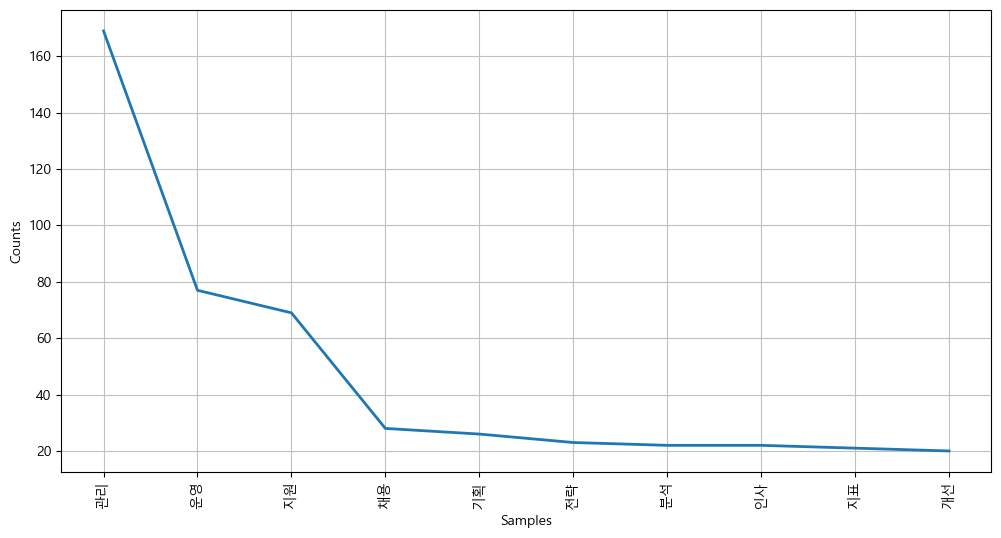

In [10]:
ko = nltk.Text(ko, name= 'Work')
plt.figure(figsize=(12,6))
ko.plot(10)
plt.show()

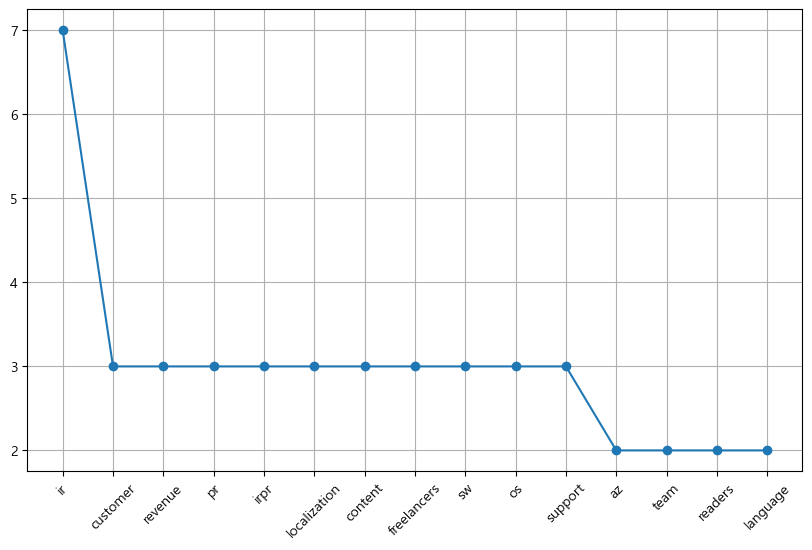

In [14]:
from langdetect import detect, DetectorFactory
from langdetect.lang_detect_exception import LangDetectException
from nltk.corpus import stopwords

# NLTK 불용어 목록 로드
stop_words = set(stopwords.words('english'))

#불용어 목록 추가
user_defined_stopwords = ['enjoy','pc','journey','work','etc','face','wallet','success','problem','solving','restful','office','back','service','skill','tool']
stop_words.update(user_defined_stopwords)

# 파일에서 텍스트를 읽는 함수
def read_file(file_name):
    with open(file_name, 'r', encoding='utf-8') as file:
        text = file.read()
    return text

# 텍스트를 영어 단어로만 토큰화하는 함수
def tokenize(text):
    words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# 단어 빈도를 줄 그래프로 그리는 함수
def plot_word_frequencies(frequencies):
    sorted_words = sorted(frequencies.items(), key=lambda x: x[1], reverse=True)

    words = [word for word, count in sorted_words[:15]]
    counts = [count for word, count in sorted_words[:15]]

    plt.figure(figsize=(10, 6))
    plt.plot(words, counts, marker='o')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


# 메인 스크립트
file_name = i
text = read_file(file_name)
words = tokenize(text)
word_frequencies = Counter(words)
plot_word_frequencies(word_frequencies)